## Curso de Big Data

## Trabajo Práctico 3 - Parte 2

### Grupo:  Armas Braithwaite, Fernández, Menta, Vargas Ochuza

In [66]:
import pandas as pd
import numpy as np
#from ISLP import load_data

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm

## Ejercicio 1

In [61]:
# Cargamos una base de internet para probar la función. 
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

In [62]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [63]:
# Quitamos todas las variables que sean string y todas las filas con NAs
titanic_df = titanic_df.drop(titanic_df.select_dtypes(include=['object']).columns, axis=1)
titanic_df=titanic_df.dropna()

In [64]:
X=titanic_df.drop(columns=['Survived'])
y=titanic_df.Survived

In [67]:
X = sm.add_constant(X)


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [72]:
def evalua_metodo(modelo, X_train, y_train, X_test, y_test, h_l=0.0001, h_k=5):
    
    '''
    Evalua un modelo de clasificación proporcionando métricas clave y visualizando la curva ROC.
    
    Input:
    - modelo: modelo de clasificación ya instanciado (debe tener los métodos `fit`, `predict` y `predict_proba`).
    - X_train, y_train: datos de entrenamiento.
    - X_test, y_test: datos de prueba.
    
    Output:
    - Diccionario con las siguientes métricas:
        * matriz_confusion: Matriz de confusión del modelo.
        * valor_auc: Área bajo la curva ROC.
        * accuracy: Precisión del modelo.
    - Gráfico de la curva ROC.
    '''
    # Entrenando el modelo
    if modelo==KNeighborsClassifier:
        y = modelo(h_k).fit(X_train, y_train)
    elif modelo== LogisticRegression:
        y = modelo(C=1/h_l).fit(X_train, y_train)
    elif modelo== LinearDiscriminantAnalysis:
        y = modelo().fit(X_train, y_train)
    else:
        y = modelo.fit(X_train, y_train)    
    # Predicciones
    y_pred = modelo.predict(X_test)
    y_pred_prob = modelo.predict_proba(X_test)[:, 1]
    
    # Calculando métricas
    matriz_confusion = confusion_matrix(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    valor_auc = auc(fpr, tpr)
    accuracy = accuracy_score(y_test, y_pred)
    ecm = mean_squared_error(y_test, y_pred) # Deseamos tener esta métrica disponible para la siguiente función. 
    # Dibujando la curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='Curva ROC (área = %0.2f)' % valor_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('Tasa de falsos positivos')
    plt.ylabel('Tasa de verdaderos positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()
    
    # Retornando métricas
    return {
        'matriz_confusion': matriz_confusion,
        'valor_auc': valor_auc,
        'accuracy': accuracy,
        'ecm': ecm,
    }


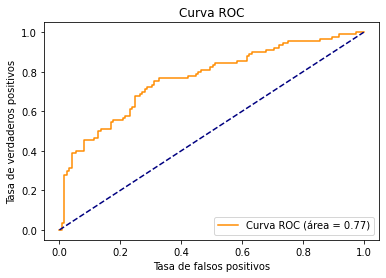

{'matriz_confusion': array([[109,  16],
       [ 45,  45]], dtype=int64), 'valor_auc': 0.7657777777777779, 'accuracy': 0.7162790697674418, 'ecm': 0.2837209302325581}


In [73]:
# Definir el modelo
modelo = LogisticRegression(max_iter=10000)
# Usar la función evalua_metodo
resultados = evalua_metodo(modelo, X_train, y_train, X_test, y_test)
print(resultados)

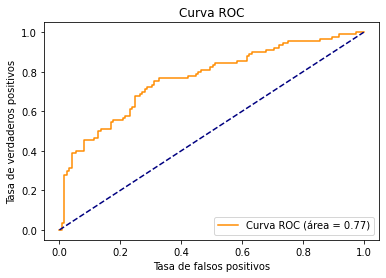

{'matriz_confusion': array([[109,  16],
       [ 45,  45]], dtype=int64), 'valor_auc': 0.7657777777777779, 'accuracy': 0.7162790697674418, 'ecm': 0.2837209302325581}


In [74]:
# Definir el modelo
modelo = LogisticRegression(max_iter=10000)
# Usar la función evalua_metodo
resultados = evalua_metodo(modelo, X_train, y_train, X_test, y_test,h_l=10)
print(resultados)

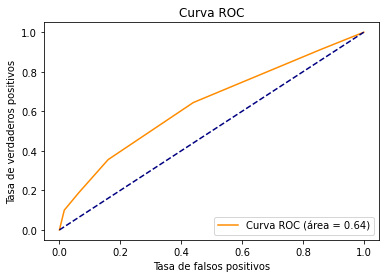

{'matriz_confusion': array([[105,  20],
       [ 58,  32]], dtype=int64), 'valor_auc': 0.6350222222222222, 'accuracy': 0.6372093023255814, 'ecm': 0.3627906976744186}


In [199]:
# Definir el modelo
knn = KNeighborsClassifier(n_neighbors=5)
modelo2=knn.fit(X_train, y_train)
#Usar la función evalua_metodo
resultados = evalua_metodo(modelo2, X_train, y_train, X_test, y_test)
print(resultados)

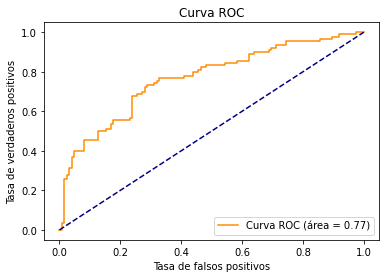

{'matriz_confusion': array([[109,  16],
       [ 45,  45]], dtype=int64), 'valor_auc': 0.7654222222222222, 'accuracy': 0.7162790697674418, 'ecm': 0.2837209302325581}


In [200]:
# Definir el modelo
modelo3= LinearDiscriminantAnalysis(n_components=1)
#Usar la función evalua_metodo
resultados = evalua_metodo(modelo3, X_train, y_train, X_test, y_test)
print(resultados)

####  PAULA PROBLEMA: Deberia cambiar el resultado segun el lambda pero no cambia, asi que debe estar mal la especificacion. Trate de hacerlo
#### de otro modo y tampoco me salia distinto.

## Ejercicio 2

In [82]:
from sklearn.preprocessing szeimport StandardScaler
import pandas as pd

In [90]:
## Vamos a definir un parámetro extra asociado a si deseamos estandarizar o no las variables. Estandarizar solo se vuelve necesario
# si vamos a regularizar luego el modelo. 
def cross_validation(modelo, k, x, y,reg=False):
    #Convertimos la data en pandas dataframe en caso no lo haya estado originalmente. 
    if isinstance(x, np.ndarray):
        x = pd.DataFrame(x)
    if isinstance(y, np.ndarray):
        y = pd.DataFrame(y)
    sc = StandardScaler()
    kf = KFold(n_splits=k, shuffle=True)
    output = [] 
    #ecm = []
    for i, (train_index, test_index) in enumerate(kf.split(x)):   
        x_train, x_test = x.iloc[list(train_index)], x.iloc[list(test_index)]
        y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]
        # Hacemos esto para tener a cada submuestra en formato dataframe y así podemos aplicar la función de estandarización aprendida
        if reg == True:
            # Estandarizamos las observaciones de entrenamiento
            x_train = pd.DataFrame(sc.fit_transform(x_train), index=x_train.index, columns=x_train.columns)
            # Estandarizamos las observaciones de test
            x_test = pd.DataFrame(sc.transform(x_test), index=x_test.index, columns=x_test.columns)
        #model=LogisticRegression(max_iter=10000)
        modelo.fit(x_train, y_train)
  # Predicciones
        y_pred = modelo.predict(x_test)
        y_pred_prob = modelo.predict_proba(x_test)[:, 1]
    # Calculando métricas
        matriz_confusion = confusion_matrix(y_test, y_pred)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        valor_auc = auc(fpr, tpr)
        accuracy = accuracy_score(y_test, y_pred)
        ecm = mean_squared_error(y_test, y_pred) 
        output.append((i+1, ecm))
    output_df = pd.DataFrame(output, columns=["Particion", "MSE"])
        
    return output_df #aqui devuelve el df de mean squared errors

In [91]:
cross_validation(modelo,5,X,y,reg=False)

,Particion,MSE
0,1,0.251748
1,2,0.314685
2,3,0.370629
3,4,0.307692
4,5,0.274648


## Ejercicio 3

### La version anterior

In [95]:
def evalua_config(configuraciones, X, y,k):
    ##Voy a explicar que significaria cada aspecto de la configuración.
    """
    Evalúa diferentes configuraciones de hiperparámetros para un modelo  de regresión logística y devuelve la mejor configuración.
    
    Parámetros:
    - configuraciones (list): Lista de diccionarios con las diferentes configuraciones de hiperparámetros.
    - X: variables independientes del conjunto de datos.
    - y: variable dependiente (target) del conjunto de datos.
    
    Devoluciones:
    - Diccionario con la mejor configuración y su correspondiente precisión promedio.
    """
    
    mejor_configuracion = None
    menor_ecm = 1000
    
    for config in configuraciones:
        modelo = LogisticRegression(max_iter=10000, **config)
        resultados = cross_validation(modelo, k, X, y)
        ecm_promedio = resultados['MSE'].mean()  
        if ecm_promedio < menor_ecm:
            menor_ecm=ecm_promedio
            mejor_configuracion=config 
        
        #if accuracy_promedio > mejor_accuracy:
            #mejor_accuracy = accuracy_promedio
            #mejor_configuracion = config
    
    return {
        'mejor_configuracion': mejor_configuracion,
        #'mejor_accuracy': mejor_accuracy
        'menor_ecm': menor_ecm 
    }





In [98]:
configuraciones = [
    {'penalty': 'l2', 'C': 1.0},
    {'penalty': 'l1', 'C': 1.0, 'solver': 'saga'},
    {'penalty': 'l2', 'C': 0.5},
    ]

resultado = evalua_config(configuraciones, X, y,10)
print(resultado)


{'mejor_configuracion': {'penalty': 'l2', 'C': 1.0}, 'menor_ecm': 0.29391627543036}


## Ejercicio 4

## Original

In [ ]:
def evalua_multiples_metodos(X, y):
    modelos = {
        "Regresion Logistica": LogisticRegression(max_iter=10000),
        "LDA": LinearDiscriminantAnalysis(),
        "KNN": KNeighborsClassifier(n_neighbors=5) # ISSUE 1: hay que flexibilizar numero de vecinos. SOLUCION FACIL
    }

    # Optimización de hiperparámetros para Regresión Logística
    configuraciones_rl = [
        {'penalty': 'l2', 'C': 1.0},
        {'penalty': 'l1', 'C': 1.0, 'solver': 'saga'},
        {'penalty': 'l2', 'C': 0.5},
        ] # ISSUE 2: hay que dejar que el usuario elige la lista de configuracion. 
          # SOLUCION DIFICIL (hay que cambiar evaluar config para eso o entender bien diccionarios) o facil: pedirle el diccionario
        # de configuraciones
    mejor_config = evalua_config(configuraciones_rl, X, y)['mejor_configuracion']
    modelos["Regresion Logistica"].set_params(**mejor_config)

    # Almacenar resultados
    resultados = []  

    for nombre, modelo in modelos.items():
        metricas = cross_validation(modelo, 5, X, y) ## ISSUE 3: hay que permitir cambiar el número de particiones 
        accuracy_promedio = metricas['accuracy'].mean() 
        valor_auc_promedio = metricas['valor_auc'].mean()
          # ISSUE 4: Hay que incluir el ECM 
        resultados.append({
            "Modelo": nombre + " " + str(modelo.get_params()),
            "accuracy_promedio": accuracy_promedio,
            "valor_auc_promedio": valor_auc_promedio
        })

    return pd.DataFrame(resultados)

In [ ]:
# Ejemplo de uso:
resultados_modelos = evalua_multiples_metodos(X, y)
print(resultados_modelos)

## Haciendole cambios

In [ ]:
def evalua_multiples_metodos(X, y,h_n):
    modelos = {
        "Regresion Logistica": LogisticRegression(max_iter=10000),
        "LDA": LinearDiscriminantAnalysis(),
        "KNN": KNeighborsClassifier(n_neighbors=h_n) 
    }

    # Optimización de hiperparámetros para Regresión Logística
    configuraciones_rl = [
        {'penalty': 'l2', 'C': 1.0},
        {'penalty': 'l1', 'C': 1.0, 'solver': 'saga'},
        {'penalty': 'l2', 'C': 0.5},
        ]
    mejor_config = evalua_config(configuraciones_rl, X, y)['mejor_configuracion']
    modelos["Regresion Logistica"].set_params(**mejor_config)

    # Almacenar resultados
    resultados = []

    for nombre, modelo in modelos.items():
        metricas = cross_validation(modelo, 5, X, y)
        accuracy_promedio = metricas['accuracy'].mean()
        valor_auc_promedio = metricas['valor_auc'].mean()

        resultados.append({
            "Modelo": nombre + " " + str(modelo.get_params()),
            "accuracy_promedio": accuracy_promedio,
            "valor_auc_promedio": valor_auc_promedio
        })

    return pd.DataFrame(resultados)